# U.S. Medical Insurance Costs

Importing databases and taking an overview of the whole Medical Insurance database.

In [361]:
#importing insurance databse, pandas and plotting database.
import insurance
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt


isd_path = "insurance.csv"
insurance_data = pd.read_csv(isd_path)
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We can now input the necessary data into python to be used for further analysis. 

First we create all the necessary lists to be used in storing the data for each column.

In [362]:
age = []
bmi = []
children = []
charges = []
sex = []
smoker = []
region = []

There are no signs of missing data in the database. It contains the following columns.

* Patient Age
* Patient BMI
* Patient's Children
* Patient Sex
* Patient's Smoking Status
* Patient's Region

We can now create a function to extract the necessary data colums into out lists for further analysis.

In [363]:
#Function to extract data from database
def extractData(lst,csv_file,colName):
    #open csv file.
    with open('insurance.csv') as csv_file:
        #read data from csv file.
        csv_data = csv.DictReader(csv_file)
        #for loop to add data into required list.
        for row in csv_data:
            lst.append(row[colName])
        #return the list.
        return list

Now we can add the data into our lists efficiently.

In [364]:
extractData(age,'insurance.csv','age')
extractData(bmi,'insurance.csv','bmi')
extractData(children,'insurance.csv','children')
extractData(charges,'insurance.csv','charges')
extractData(sex,'insurance.csv','sex')
extractData(smoker,'insurance.csv','smoker')
extractData(region,'insurance.csv','region')

list

Now i will check to see if all the data has been imported successfully with the proper length of enteries. 

In [365]:
#printing the lenghts of each list to compare with the dataset's rows.
print(len(age))
print(len(bmi))
print(len(children))
print(len(charges))
print(len(sex))
print(len(smoker))
print(len(region))

1338
1338
1338
1338
1338
1338
1338


# Cleaning Data
Now i will look to find any incorrect enteries of the wrong type and any outliers. 

In [366]:
#Seting age,bmi,children and charges to their apporpriate types of int and float incase there are any incorrect enteries.
age = [int(i) for i in age]
bmi = [float(i) for i in bmi]
children = [int(i) for i in children]
charges = [float(i) for i in charges]

In [367]:
#Functions to find the scope and unique values of the data.

def scope(lst,name):
    min_value = min(lst)
    max_value = max(lst)
    print('The minimum ' + str(name) + ' is ' + str(min_value))
    print('The maximum ' + str(name) + ' is ' + str(max_value))

def unique(lst,name):
    unique_list = []
    for i in lst:
        if i not in unique_list:
            unique_list.append(i)
    
    print('Unique values in ' + name + ' are ' + str(unique_list))

Lets call the functions to see if the scope of the data is correct, as per the dataset the data is from an adult population so the age should be above 18 years.

In [368]:
scope(age,'Age')
scope(bmi,'BMI')
scope(children,'Children')
scope(charges,'Charge')

The minimum Age is 18
The maximum Age is 64
The minimum BMI is 15.96
The maximum BMI is 53.13
The minimum Children is 0
The maximum Children is 5
The minimum Charge is 1121.8739
The maximum Charge is 63770.42801


In [369]:
#Checking if the sexes are only male and female.
unique(sex,'Gender')

Unique values in Gender are ['female', 'male']


Creating a patient information class that will include all details and be able to calculate:
* average age of males and females
* percentage of people from each region 
* effects of smoking on charges
* percentage of males vs females in the dataset.
* average yearly charges of both genders

In [370]:
class PatientData:
    # init function that takes in the lists parameters.
    def __init__(self, patients_ages, patients_sexes, patients_bmis, patients_num_children, patients_smoker_statuses, patients_regions, patients_charges):
        self.patients_ages = patients_ages
        self.patients_sexes = patients_sexes
        self.patients_bmis = patients_bmis
        self.patients_num_children = patients_num_children
        self.patients_smoker_statuses = patients_smoker_statuses
        self.patients_regions = patients_regions
        self.patients_charges = patients_charges

    #method to calculate the average age of males and females.
    def calcAverageAges(self):
        #all variables to be used below.
        total_age = 0
        totalMale_age = 0
        totalFemale_age = 0
        average = 0
        averageMale = 0
        averageFemale = 0
        no_of_females = 0
        no_of_males = 0

        #loop to find average patient age
        for age in self.patients_ages:
            #add all ages from age list
            total_age += age
        #find average by dividing total by length of self.patients_ages list.
        average = total_age / round(len(self.patients_ages),2)

        #combining age and sexes list using zip() function.
        patient_ages_and_sexes = list(zip(self.patients_ages,self.patients_sexes))
        
        #i variable to iterate through the zipped list for gender and ages.
        i = 0
        for age_sex in patient_ages_and_sexes:
            if patient_ages_and_sexes[i][1] == 'male':
                #add all ages of males from zipped list
                totalMale_age += patient_ages_and_sexes[i][0]
                no_of_males += 1
            elif patient_ages_and_sexes[i][1] == 'female':
                #add all ages of females from zipped list
                totalFemale_age += patient_ages_and_sexes[i][0]
                no_of_females += 1
            
            i += 1
        

        #find average by dividing total by length of self.patients_ages list.
        averageMale = totalMale_age / round(no_of_males,2)
        averageFemale = totalFemale_age / round(no_of_females,2)

        #return the average.
        print('The average patient age is: ' + str(int(average)))
        print('The average male patients age is: ' + str(int(averageMale)))
        print('The average female patients age is: ' + str(int(averageFemale)))
        print('The percentage of males is: ' + format(no_of_males/1338,".0%"))
        print('The percentage of females is: ' + format(no_of_females/1338,".0%"))

        #Plotting a distribution graph. 
        plt.hist(self.patients_ages, color='orange', ec='black', bins=15)

    #Method to find all the regions the patients are from and their percentages.
    def findRegions(self):
        #empty list to contain regions.
        unique_region = []
        for region in self.patients_regions:
            #if the region is not in the list then add it.
            if region not in unique_region:
                unique_region.append(region)    

        percentages = []
        #check to see how many people live in each region.
        for people in unique_region:
            percentages.append(format(self.patients_regions.count(people)/len(self.patients_regions),".0%"))

        #combining region and percentages list.
        region_percentages = list(zip(unique_region,percentages))
        #printing all region percentages
        for region in region_percentages:
            print("The percentage of people living in: " + str(region)) 

        region_data = [24,27,24,24]

        plt.pie(region_data, labels=unique_region, autopct='%.0f%%')


    def calcAvgCharges(self):
        #variable to store total charges.
        total_charges = 0
        for charges in self.patients_charges:
            #add the total charges from the list.
            total_charges += float(charges)
        
        averageCharges = round(total_charges/len(self.patients_charges),3)

        print('The average yearly insurance charges are: $' + str(averageCharges))

# Data Analysis

Now lets create an instance object from the class `PatientInfo` so we can analyze our variables better.

The average patient age is: 39
The average male patients age is: 38
The average female patients age is: 39
The percentage of males is: 51%
The percentage of females is: 49%


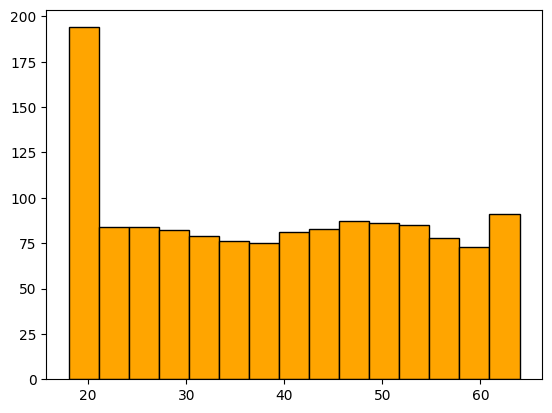

In [371]:
patient_info = PatientData(age,sex,bmi,children,smoker,region,charges)

#Calculating the average ages and percentages in the dataset.
patient_info.calcAverageAges()


From this we can conclude the data is balanced and has a near equal number of females and males which shows it is not biased towards a single gender. 

The the difference between the average male and female ages in the data is only 1 year which is 2%. 

The age also leans towards middle aged people.

The percentage of people living in: ('southwest', '24%')
The percentage of people living in: ('southeast', '27%')
The percentage of people living in: ('northwest', '24%')
The percentage of people living in: ('northeast', '24%')


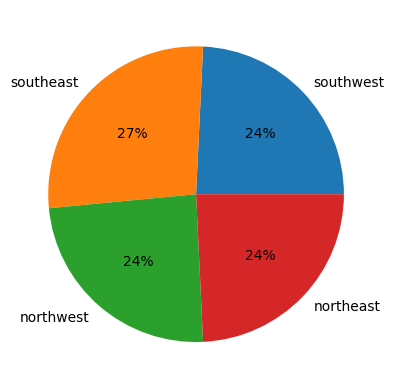

In [372]:
patient_info.findRegions()

We can see that all the people belong to the united states and there is a balanced proportion of people from all four areas of the U.S.

In [373]:
patient_info.calcAvgCharges()

The average yearly insurance charges are: $13270.422


The average yearly insurance charges are $13,270, we can further anylyze which variables influence this cost such as:

* Patients Smoking Status
* Patients Age
* Patients Gender
* No of Children a patient has.

# Smoking and Charges

The average cost for non-smokers is: 8434.27
The average cost for smokers is: 32050.23


<Axes: xlabel='smoker', ylabel='charges'>

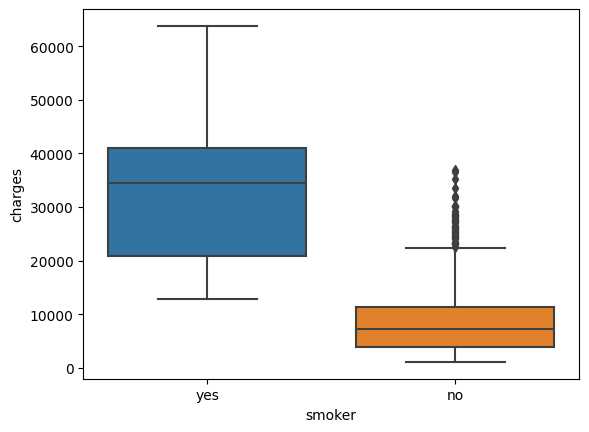

In [374]:
# Calculate the average cost for smokers and non-smokers
smoker_costs = insurance_data.groupby('smoker')['charges'].mean()

print('The average cost for non-smokers is:', round(smoker_costs[0], 2))
print('The average cost for smokers is:', round(smoker_costs[1], 2))

sns.boxplot(x='smoker', y='charges', data = insurance_data)



We can see that the smoking status of a patient has a huge influence on the insurance charges he/she has to pay. Smokers have a medium charge above `20,000` while non smokers are below `10,000`. The difference in outliers is also great, with smokers having more extreme outliers. 

# Children and Charges

The average cost for no children is: 12365.98
The average cost for 1 child is:  12731.17
The average costs for 2 children are:  15073.56
The average costs for 3 children are:  15355.32
The average costs for 4 children are:  13850.66
The average costs for 5 children are:  8786.04


<Axes: xlabel='children', ylabel='charges'>

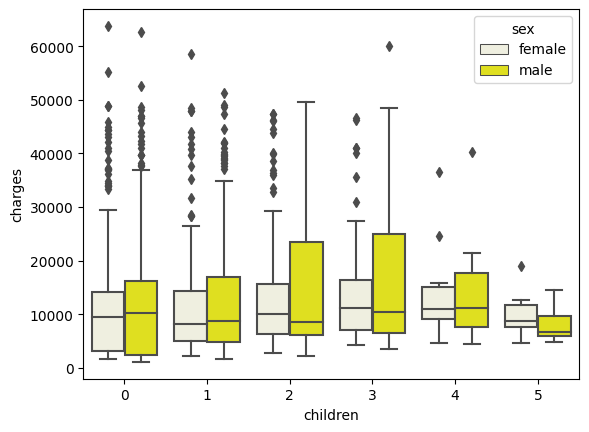

In [391]:
# Calculate the average cost for smokers and non-smokers
children_costs = insurance_data.groupby('children')['charges'].mean()

print('The average cost for no children is:', round(children_costs[0], 2))
print('The average cost for 1 child is: ', round(children_costs[1], 2))
print('The average costs for 2 children are: ', round(children_costs[2], 2))
print('The average costs for 3 children are: ', round(children_costs[3], 2))
print('The average costs for 4 children are: ', round(children_costs[4], 2))
print('The average costs for 5 children are: ', round(children_costs[5], 2))


sns.boxplot(x='children', y='charges', data = insurance_data, hue='sex', color='yellow')

The numbers show that the cost for having 2 children rates the highest at aproximaticaly 15350 with 3 and 4 trailing just behind. The graph also points to this. 

Patients with 5 children show the least outliers and those with none show the most. There is however great variability in this data which shows there might be more to these changes in charges and that the number of children are not strongly coorelated to charges.

A potential thing to note is that males with 2 or 3 children tend to have a wider range of charges in this dataset as compared to females which seems to be consistent across the board. It remains to be seen whether this is by chance or if it shows a potential cooleration.

# BMI and Charges

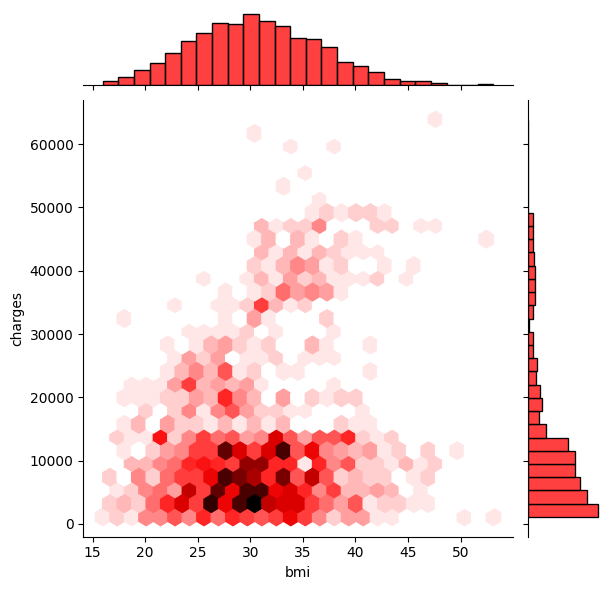

In [387]:
sns.jointplot(x='bmi', y='charges', data=insurance_data, kind='hex', color='red')

The mean BMI is around 30.0. The scatter graph shows a consistent increase in charges as the BMI increases showing a positive coorelation between both variables. 

In general most individuals with a lower BMI face lower charges whereas individuals with higher BMI results tend to have both high and similar costs to that of lower BMI individuals. 

# Age and Charges

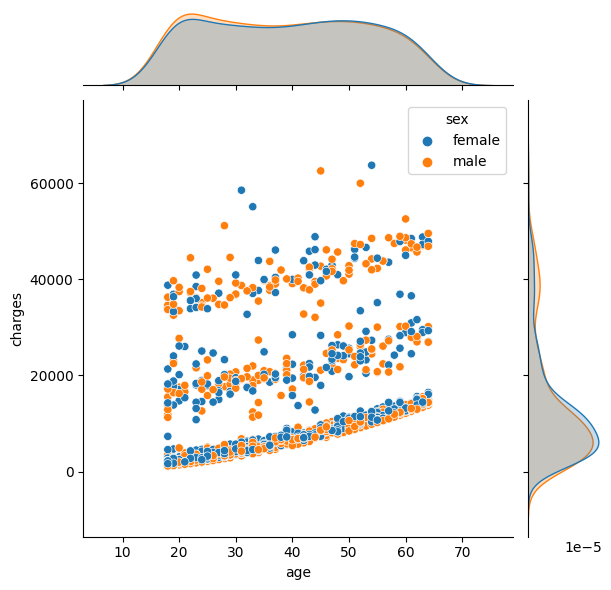

In [383]:
sns.jointplot(x='age', y='charges', data=insurance_data, hue='sex')

There a strong coorelation between ages and charges showing a consistent upward trend as the ages increase with regards to charges. 

Across all ages we see individuals that face higher charges, with some extreme outliers showing charges of 50,000 and above. 

Females and Males face similar medical costs and show no changes in regards to gender.

The plot also points to the fact that in general younger individuals face lower medical charges and older people face greater medical charges with no outliers proving that older individuals face the same lower spectrum of charges as the younger people. 

# Potential Biases regarding the data

* Scope Bias - The data is recorded with only individuals from the US and may not be applicable to a wider audience wordwide. More research needs to be done with encompassing different countries and societies.

* Self-Selection Bias - This data is applicable only to an audience who has opted to apply for medical insurance, and may be different if applied to a wider audience. 

* Self-Reporting Bias - Individuals in this dataset have self reported the data which can result in possible inconsistencies or errors. For example someone may make a mistake in describing their medical insurance charges by wrong entry or misinform of their smoking status.

* Sampling Bias - Its not clear as to what the background of these individuals were, and therefore data may be limited to a certain type of individuals intead of a broader scope of individuals encompassing healthy and those with different illneses. 

# Conclusion

In conclusion the data set is well balanced and does not skew towards one gender. 

There is cooeration amongst all variables but the strongest coorelation shows between `Smokers and charges` with the weakest being `Children and charges`. 

Age shows a positive consistent coorelation with increase charges as age increases. 